In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error

In [3]:
iris = load_iris()

In [4]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [9]:
### Independent features
x = pd.DataFrame(iris['data'], columns=['sepal length', 'sepal width','petal length','petal width'])
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
### dependent features
y = iris['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
### train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=450)

In [12]:
### Apply decision tree classifier
treeclassifier = DecisionTreeClassifier()

In [13]:
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5357142857142857, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [38, 44, 38]'),
 Text(0.4642857142857143, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.6071428571428571, 0.75, 'x[3] <= 1.75\ngini = 0.497\nsamples = 82\nvalue = [0, 44, 38]'),
 Text(0.5714285714285714, 0.8333333333333333, '  False'),
 Text(0.35714285714285715, 0.5833333333333334, 'x[2] <= 5.05\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[0] <= 4.95\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]'),
 Text(0.14285714285714285, 0.25, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.5, 0.41666

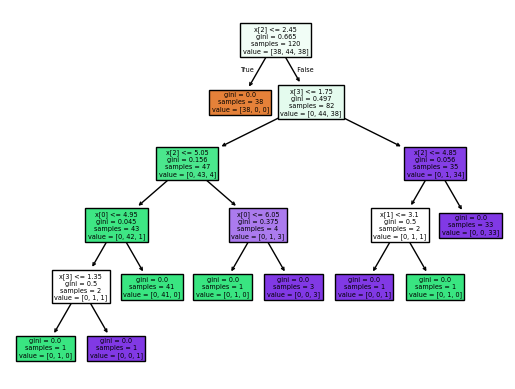

In [15]:
plt.Figure(figsize=(15, 10))
tree.plot_tree(treeclassifier,filled=True)

In [17]:
treeclassifier1 = DecisionTreeClassifier(max_depth=2)

In [18]:
treeclassifier1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [38, 44, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.497\nsamples = 82\nvalue = [0, 44, 38]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

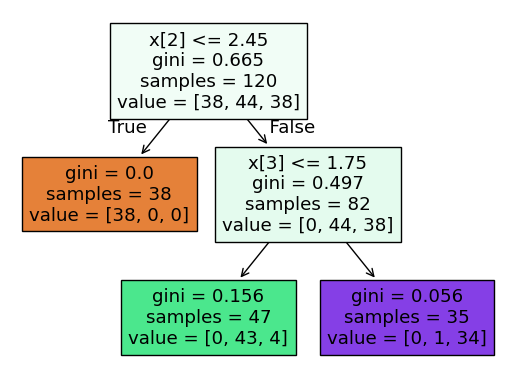

In [19]:
plt.Figure(figsize=(15, 10))
tree.plot_tree(treeclassifier1,filled=True)

In [20]:
y_pred = treeclassifier1.predict(x_test)

In [21]:
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[12  0  0]
 [ 0  6  1]
 [ 0  0 11]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92         7
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



## Decision tree regressor

In [32]:
diabetes = load_diabetes()

In [33]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [37]:
X = pd.DataFrame(diabetes['data'], columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [38]:
Y = diabetes['target']
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [39]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=45)

In [40]:
x_train1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
357,-0.060003,0.050680,0.049840,0.018430,-0.016704,-0.030124,-0.017629,-0.002592,0.049770,-0.059067
327,0.074401,-0.044642,0.114509,0.028758,0.024574,0.024991,0.019187,-0.002592,-0.000612,-0.005220
259,0.012648,-0.044642,-0.036385,0.042529,-0.013953,0.012934,-0.026833,0.005157,-0.043984,0.007207
47,-0.078165,-0.044642,-0.073030,-0.057313,-0.084126,-0.074277,-0.024993,-0.039493,-0.018114,-0.083920
279,0.038076,0.050680,-0.024529,0.004658,-0.026336,-0.026366,0.015505,-0.039493,-0.015999,-0.025930


In [44]:
cor = x_train1.corr()
cor

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.161644,0.215109,0.354017,0.310912,0.295205,-0.095405,0.230446,0.260613,0.343693
sex,0.161644,1.000000,0.143211,0.264140,0.050597,0.181142,-0.376311,0.328876,0.110664,0.221563
bmi,0.215109,0.143211,1.000000,0.434357,0.244451,0.267571,-0.383209,0.420690,0.440368,0.391786
bp,0.354017,0.264140,0.434357,1.000000,0.276450,0.215121,-0.192405,0.288166,0.440962,0.423409
s1,0.310912,0.050597,0.244451,0.276450,1.000000,0.889291,0.034574,0.547888,0.541307,0.345460
s2,0.295205,0.181142,0.267571,0.215121,0.889291,1.000000,-0.234042,0.682773,0.325468,0.300502
s3,-0.095405,-0.376311,-0.383209,-0.192405,0.034574,-0.234042,1.000000,-0.747520,-0.349464,-0.265736
s4,0.230446,0.328876,0.420690,0.288166,0.547888,0.682773,-0.747520,1.000000,0.586713,0.409639
s5,0.260613,0.110664,0.440368,0.440962,0.541307,0.325468,-0.349464,0.586713,1.000000,0.486091
s6,0.343693,0.221563,0.391786,0.423409,0.345460,0.300502,-0.265736,0.409639,0.486091,1.000000


<Axes: >

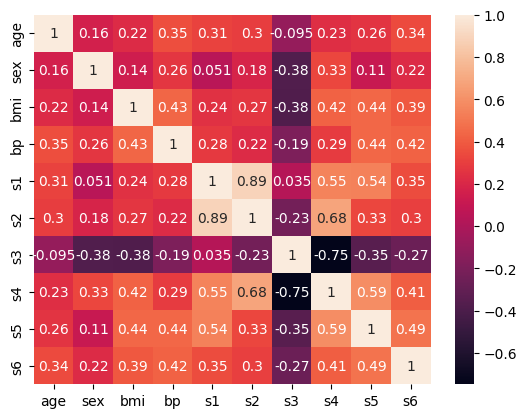

In [45]:
plt.Figure(figsize=(15, 20))
sns.heatmap(cor, annot=True)

In [46]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(x_train1, y_train1)

DecisionTreeRegressor()

## HyperParameter Tuning

In [49]:
param = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          'splitter': ['best', 'random'],
          'max_depth': [1,2,5,10,15,20],
          'max_features': ['auto', 'sqrt', 'log2']
         }
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 5, 10, 15, 20],
 'max_features': ['auto', 'sqrt', 'log2']}

In [50]:
grid = GridSearchCV(dec_reg, param_grid=param, cv=5, scoring='neg_mean_squared_error')
grid

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [53]:
grid.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [54]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [55]:
y_pred1 = grid.predict(x_test1)

In [57]:
print(r2_score(y_pred1, y_test1))
print(mean_absolute_error(y_pred1, y_test1))
print(mean_squared_error(y_pred1, y_test1))

-0.759055375090536
51.69698163983587
4068.6531418749305


In [59]:
se = DecisionTreeRegressor(criterion= 'friedman_mse',
 max_depth = 5,
 max_features = 'sqrt',
 splitter = 'random')

In [60]:
se.fit(x_train1, y_train1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='sqrt', splitter='random')

[Text(0.5125, 0.9166666666666666, 'x[8] <= -0.008\nfriedman_mse = 6181.474\nsamples = 309\nvalue = 150.909'),
 Text(0.27, 0.75, 'x[3] <= 0.043\nfriedman_mse = 3183.768\nsamples = 154\nvalue = 108.104'),
 Text(0.39125, 0.8333333333333333, 'True  '),
 Text(0.16, 0.5833333333333334, 'x[5] <= 0.027\nfriedman_mse = 2653.934\nsamples = 137\nvalue = 103.27'),
 Text(0.08, 0.4166666666666667, 'x[6] <= -0.013\nfriedman_mse = 2583.481\nsamples = 121\nvalue = 100.198'),
 Text(0.04, 0.25, 'x[0] <= 0.078\nfriedman_mse = 3858.609\nsamples = 23\nvalue = 125.0'),
 Text(0.02, 0.08333333333333333, 'friedman_mse = 3773.777\nsamples = 22\nvalue = 121.636'),
 Text(0.06, 0.08333333333333333, 'friedman_mse = 0.0\nsamples = 1\nvalue = 199.0'),
 Text(0.12, 0.25, 'x[1] <= -0.019\nfriedman_mse = 2105.97\nsamples = 98\nvalue = 94.378'),
 Text(0.1, 0.08333333333333333, 'friedman_mse = 2055.563\nsamples = 73\nvalue = 98.452'),
 Text(0.14, 0.08333333333333333, 'friedman_mse = 2063.13\nsamples = 25\nvalue = 82.48'),
 

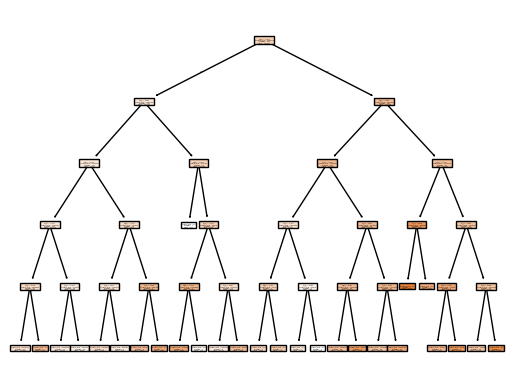

In [61]:
plt.Figure(figsize=(15, 20))
tree.plot_tree(se,filled=True)